In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Load data and plot a correlation heatmap

In [15]:
data_5=pd.read_csv("cleaned_data.csv")

In [16]:
data_5.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,1587,45,13,0,0,0,0,0,0,0
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,1587,27,19,0,0,0,0,0,0,0
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,1587,4,11,0,0,0,0,0,0,0
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,872,16,10,0,0,0,0,0,0,0
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,872,27,12,0,0,0,0,0,0,0


In [17]:
data_5.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [18]:
data_5.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [19]:
#removing columns which wont be used in the model
data_5.drop(["Unnamed: 0" , "UniqueCarrier" ,"FlightNum" ,"TailNum" , "Cancelled" , "Diverted" , "Year" , "DepTime" , "ArrTime" ,"Origin" , "Dest" , "ActualElapsedTime" , "AirTime","CRSElapsedTime" , "WeatherDelay" , 'NASDelay' , "CarrierDelay" , "SecurityDelay"], axis=1 , inplace=True)

In [20]:
#Add a new column called delaystatus which changes the ArrDelay column into a binary column which could be used as our dependent variable.

In [21]:
def clean(df):
    if df["ArrDelay"]>0 :
        return 1
    else:
        return 0

In [22]:
data_5["delaystatus"]=data_5.apply(clean , axis=1)

In [23]:
data_5.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,LateAircraftDelay,delaystatus
0,1,11,3,745,1018,6.0,-2.0,1587,45,13,0,1
1,1,11,3,1053,1318,-5.0,0.0,1587,27,19,0,0
2,1,11,3,1915,2133,-23.0,0.0,1587,4,11,0,0
3,1,11,3,1755,1933,-8.0,-2.0,872,16,10,0,0
4,1,11,3,832,1015,0.0,-8.0,872,27,12,0,0


In [24]:
data_5["delaystatus"].value_counts()

0    7626703
1    6642225
Name: delaystatus, dtype: int64

In [25]:
data_5["delaystatus"].value_counts()/data_5.shape[0]

0    0.534497
1    0.465503
Name: delaystatus, dtype: float64

In [26]:
#hence we can see that theres no imbalance in classification

In [27]:
data_5.drop(["ArrDelay"] , axis=1 , inplace=True)

In [28]:
data_5.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,Distance,TaxiIn,TaxiOut,LateAircraftDelay,delaystatus
0,1,11,3,745,1018,-2.0,1587,45,13,0,1
1,1,11,3,1053,1318,0.0,1587,27,19,0,0
2,1,11,3,1915,2133,0.0,1587,4,11,0,0
3,1,11,3,1755,1933,-2.0,872,16,10,0,0
4,1,11,3,832,1015,-8.0,872,27,12,0,0


In [29]:
#plot a correlation matrix using the heatmap graph

<AxesSubplot:>

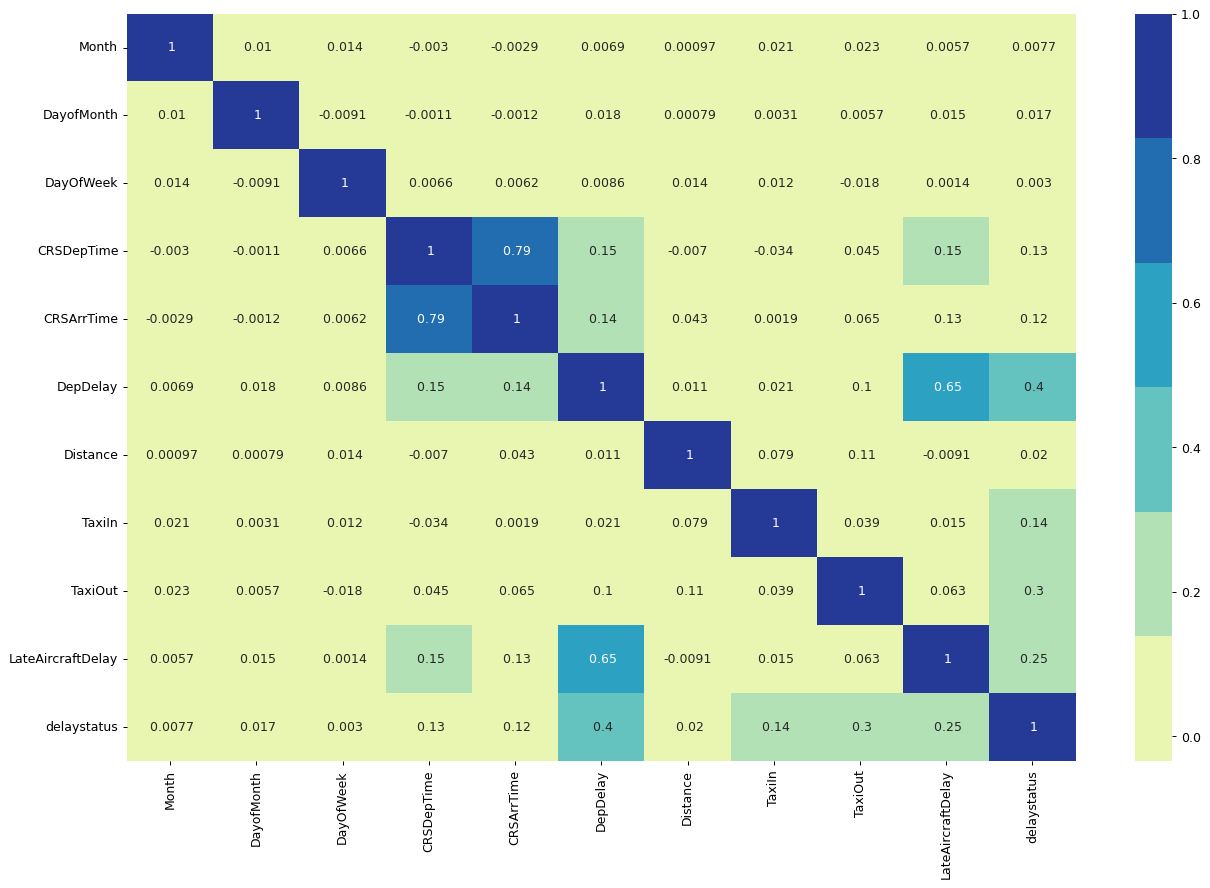

In [30]:
figure=plt.figure(figsize=(17,11) , dpi=90)
sns.heatmap(data_5.corr() , annot=True , fmt=" .2g" , cmap=sns.color_palette("YlGnBu"))

# Select features

In [31]:
#split the data into the explanatory variables and the dependent variable.
#The delaystatus is considered as the dependent variable and if the correlation between the delaystatus and a feature is more than 0.1 the feauture is considered as an explanatory variable

In [32]:
y=data_5["delaystatus"]
x=data_5.loc[:, ["CRSDepTime" , "CRSArrTime" , "DepDelay" , "TaxiIn" , "TaxiOut"  , "LateAircraftDelay" , "CRSArrTime" , "CRSDepTime"]]

# Split the data to train data ,test data and scale it

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25 , random_state=1 )

In [34]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(3567232, 8)
(10701696, 8)
(3567232,)
(10701696,)


In [35]:
#Scale the data using the Min max scaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [36]:
x_test

array([[ 2.21168553, -2.02299249, -0.33675434, ..., -0.23618976,
        -2.02299249,  2.21168553],
       [-0.26306753, -0.52008097, -0.27911827, ..., -0.23618976,
        -0.52008097, -0.26306753],
       [-0.65790607, -0.38250515, -0.59611664, ..., -0.23618976,
        -0.38250515, -0.65790607],
       ...,
       [-0.27601305, -0.1448742 , -0.19266417, ..., -0.23618976,
        -0.1448742 , -0.27601305],
       [ 0.44246364,  0.24909289, -0.19266417, ..., -0.23618976,
         0.24909289,  0.44246364],
       [-1.04627185, -1.23505829, -0.53848057, ..., -0.23618976,
        -1.23505829, -1.04627185]])

In [37]:
x_train

array([[ 0.19434106,  0.05315159, -0.3079363 , ..., -0.23618976,
         0.05315159,  0.19434106],
       [-1.56409289, -1.15584798, -0.3079363 , ..., -0.23618976,
        -1.15584798, -1.56409289],
       [-0.66869401, -0.70768435, -0.3943904 , ..., -0.23618976,
        -0.70768435, -0.66869401],
       ...,
       [-0.4421473 , -0.52008097, -0.25030024, ..., -0.23618976,
        -0.52008097, -0.4421473 ],
       [ 1.55362129,  1.34553043, -0.19266417, ..., -0.23618976,
         1.34553043,  1.55362129],
       [-1.52957149, -1.59984264, -0.36557237, ..., -0.23618976,
        -1.59984264, -1.52957149]])

# Developing the Model and prediction

In [38]:
logistic_regression=LogisticRegression(random_state=9)


In [39]:
#fit the model with the data


In [40]:
logistic_regression.fit(x_train, y_train)
y_predicted=logistic_regression.predict(x_test)

In [41]:
y_predicted

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [42]:
#Evaluate the model 
confusion_mx=metrics.confusion_matrix(y_test, y_predicted)
confusion_mx

array([[1717876,  189324],
       [ 419765, 1240267]], dtype=int64)

In [43]:
#CONSTRUCT A CONFUSION MATRIX AND CHECK FOR THE ACCURACY 

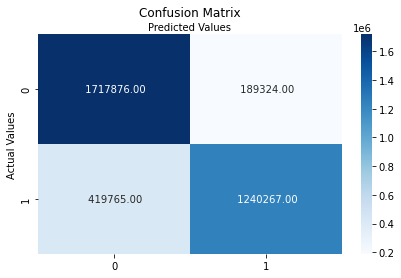

In [44]:
Arrdelay_values=[0,1]
fig , ax=plt.subplots()
tick_Arrdelay=np.arange(len(Arrdelay_values))
plt.yticks(tick_Arrdelay , Arrdelay_values)
plt.xticks(tick_Arrdelay , Arrdelay_values)

sns.heatmap(pd.DataFrame(confusion_mx), annot=True, cmap="Blues" , fmt= " .2f")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.tight_layout()
ax.xaxis.set_label_position('top')
plt.show()


In [45]:
#verify the accuracy of the confusion matrix
from sklearn.metrics import classification_report
print(classification_report (y_test , y_predicted))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85   1907200
           1       0.87      0.75      0.80   1660032

    accuracy                           0.83   3567232
   macro avg       0.84      0.82      0.83   3567232
weighted avg       0.83      0.83      0.83   3567232



In [46]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_predicted)
accuracy

0.829254447145574

In [47]:
#PLOT A ROC CURVE

In [48]:
x_test

array([[ 2.21168553, -2.02299249, -0.33675434, ..., -0.23618976,
        -2.02299249,  2.21168553],
       [-0.26306753, -0.52008097, -0.27911827, ..., -0.23618976,
        -0.52008097, -0.26306753],
       [-0.65790607, -0.38250515, -0.59611664, ..., -0.23618976,
        -0.38250515, -0.65790607],
       ...,
       [-0.27601305, -0.1448742 , -0.19266417, ..., -0.23618976,
        -0.1448742 , -0.27601305],
       [ 0.44246364,  0.24909289, -0.19266417, ..., -0.23618976,
         0.24909289,  0.44246364],
       [-1.04627185, -1.23505829, -0.53848057, ..., -0.23618976,
        -1.23505829, -1.04627185]])

In [49]:
logistic_regression.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [50]:
logistic_regression.predict_proba(x_test)[::,1]

array([0.48463803, 0.22468638, 0.04205679, ..., 0.87961912, 0.16418131,
       0.08283122])

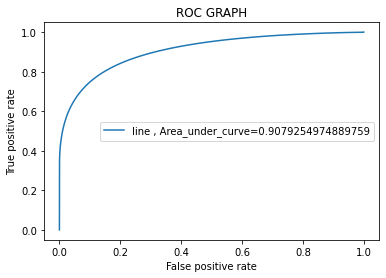

In [51]:
y_pred=logistic_regression.predict_proba(x_test)[::,1]
fpr , tpr , _ = metrics.roc_curve(y_test, y_pred)
Area_under_curve=metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr , label= "line , Area_under_curve=" +str(Area_under_curve))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC GRAPH")
plt.legend(loc=5)
plt.show()

In [52]:
#Since the area under the curve is almost one the accuracy is good